# Titanic Survival Prediction Project
## Author: [Deepayan Thakur](https://github.com/Deepayan-Thakur/Machine-Learning-Projects)


## Introduction
This project aims to predict the survival of passengers on the Titanic using various machine learning algorithms. The process involves data cleaning, feature engineering, and model training.

## Required Imports
The following libraries are required for this analysis:
- `pandas` for data manipulation and analysis.
- `seaborn` for statistical data visualization.
- `matplotlib.pyplot` for plotting graphs.

```python
# Required Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Loading the Dataset
The Titanic dataset is loaded from a CSV file located as follows

Click Here 👉: [Github - Titanic Dataset (raw)](https://github.com/Deepayan-Thakur/Machine-Learning-Projects/blob/main/Project1/data/raw/titanic.csv)

This dataset contains various features of the passengers that will be used for predicting their survival.
as 

## Features and Target

### Features in `titanic.csv`
- **`PassengerId`**: Unique identifier for each passenger.
- **`Pclass`**: Passenger class (1st, 2nd, or 3rd).
- **`Name`**: Name of the passenger.
- **`Sex`**: Gender of the passenger (male or female).
- **`Age`**: Age of the passenger in years.
- **`SibSp`**: Number of siblings or spouses aboard the Titanic.
- **`Parch`**: Number of parents or children aboard the Titanic.
- **`Ticket`**: Ticket number.
- **`Fare`**: Amount of money paid for the ticket.
- **`Cabin`**: Cabin number (if available).
- **`Embarked`**: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).

### Target Variable
- **`Survived`**: Whether the passenger survived (1) or did not survive (0). This is present in the `train.csv` file and is used for training the model.


### Displaying Basic Information
Basic information about the dataset, including the `number of entries`, `column names`, and `data types`, is displayed using the info() method.

In [12]:
# Required Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset directly from GitHub (raw link)
url = "https://raw.githubusercontent.com/Deepayan-Thakur/Machine-Learning-Projects/main/Project1/data/raw/titanic.csv"
titanic_df = pd.read_csv(url)

# Displaying basic information
print(titanic_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


## Diplaying the data
The `First 5 rows` of the dataset are as follows

In [13]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Visualizing the Distribution of the Target Variable

To understand the distribution of the target variable 'Survived', we can use a count plot. 

This plot shows the count of observations in each categorical bin, which, in this case, represents whether passengers `survived or not.`


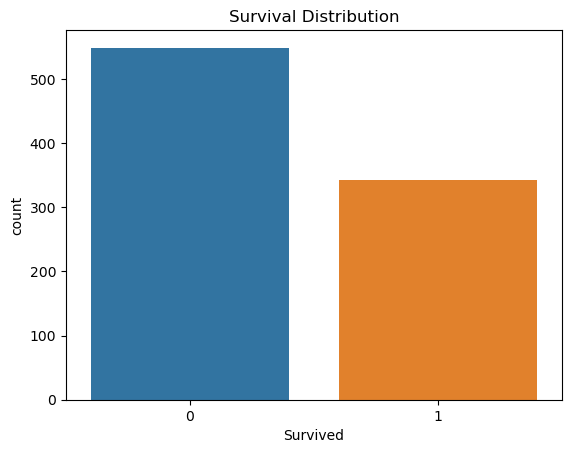

In [6]:
# Visualizing the distribution of the target variable
sns.countplot(x='Survived', data=titanic_df)
plt.title('Survival Distribution')
plt.show()

## Visualizing Survival by Passenger Class

To gain insights into how survival rates differ across passenger classes. 

We use a count plot that shows the distribution of `survivors` and `non-survivors` within `each passenger class`.

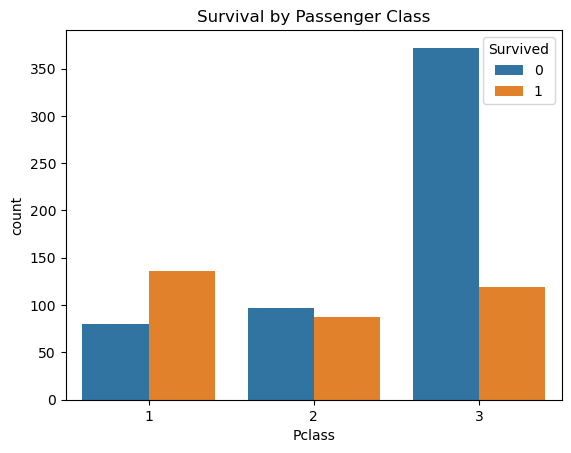

In [7]:
# Visualizing the Survival by "Passenger Class"
sns.countplot(x='Pclass', hue='Survived', data=titanic_df)
plt.title('Survival by Passenger Class')
plt.show()

## Visualizing Survival by Sex

To explore how survival rates differ between male and female passengers.

We use a count plot that shows the distribution of `survivors` and `non-survivors` by `sex`.

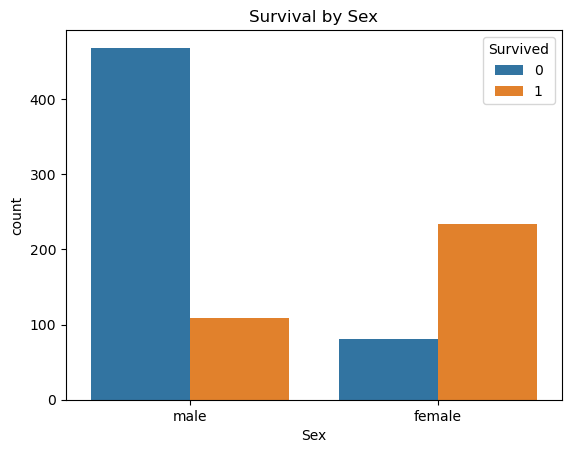

In [8]:
# Visualizing the Survival by "Sex"
sns.countplot(x='Sex', hue='Survived', data=titanic_df)
plt.title('Survival by Sex')
plt.show()

## Visualizing Age Distribution by Survival

To understand how age distribution varies between passengers `who survived` and those `who did not`.

We use `histograms` to compare these distributions.


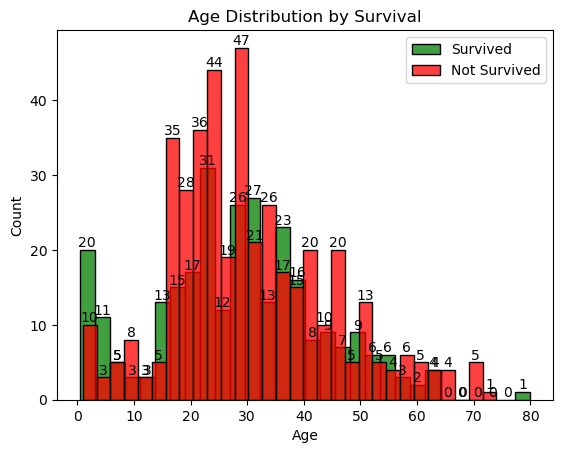

In [10]:
# Import necessary library
import matplotlib.pyplot as plt

# Plotting the age distribution for passengers who survived
ax = sns.histplot(titanic_df[titanic_df['Survived'] == 1]['Age'].dropna(), 
                  kde=False, # Do not add a Kernel Density Estimate plot
                  bins=30, # Number of bins for the histogram
                  label='Survived', # Label for the legend
                  color='green') # Color for the histogram

# Adding bar labels for the 'Survived' histogram
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Plotting the age distribution for passengers who did not survive
ax = sns.histplot(titanic_df[titanic_df['Survived'] == 0]['Age'].dropna(), 
                  kde=False, 
                  bins=30,
                  label='Not Survived',
                  color='red')

# Adding bar labels for the 'Not Survived' histogram
for p in ax.patches[len(ax.patches)//2:]: # Adjusting the range to avoid double annotation
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Setting the title of the plot
plt.title('Age Distribution by Survival')

# Adding a legend to distinguish between the two distributions
plt.legend()

# Displaying the plot
plt.show()
